In [2]:
!pip install astral

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [1]:
import datetime
from astral import Astral, Location

ModuleNotFoundError: No module named 'astral'

In [0]:
import pandas as pd

In [0]:
dates = pd.date_range('20190701', periods=365)

In [4]:
dates

DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
               '2019-07-09', '2019-07-10',
               ...
               '2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27',
               '2020-06-28', '2020-06-29'],
              dtype='datetime64[ns]', length=365, freq='D')

In [5]:
df = pd.DataFrame(dates, columns=['date'])
#df = pd.DataFrame(index=dates)
df.head()

date
0 2019-07-01
1 2019-07-02
2 2019-07-03
3 2019-07-04
4 2019-07-05

In [0]:
a = Astral()
a.solar_depression = 'civil'

In [10]:
l = Location()
l.name = 'São Paulo'
l.region = 'Brasil'
l.latitude = -23.543333
l.longitude = -46.633056
l.timezone = 'America/Sao_Paulo'
l.elevation = 0
l.sun(df['date'][0], local=True)

{'dawn': datetime.datetime(2019, 7, 1, 6, 24, 31, tzinfo=<DstTzInfo 'America/Sao_Paulo' -03-1 day, 21:00:00 STD>),
 'dusk': datetime.datetime(2019, 7, 1, 17, 56, tzinfo=<DstTzInfo 'America/Sao_Paulo' -03-1 day, 21:00:00 STD>),
 'noon': datetime.datetime(2019, 7, 1, 12, 10, 15, tzinfo=<DstTzInfo 'America/Sao_Paulo' -03-1 day, 21:00:00 STD>),
 'sunrise': datetime.datetime(2019, 7, 1, 6, 49, 9, tzinfo=<DstTzInfo 'America/Sao_Paulo' -03-1 day, 21:00:00 STD>),
 'sunset': datetime.datetime(2019, 7, 1, 17, 31, 21, tzinfo=<DstTzInfo 'America/Sao_Paulo' -03-1 day, 21:00:00 STD>)}

In [11]:
#df['sunrise'] =  df.apply(lambda row: l.sun(date=row['date'], local=True)['sunrise'], axis=1) 
def sundata(col):
    daysun = l.sun(date=col, local=True)
    return daysun['sunrise'], daysun['sunset']

df['sundata'] = df['date'].apply(sundata)
df['sunrise'] = df['sundata'].apply(lambda col: col[0].strftime('%H:%M'))
df['sunset'] = df['sundata'].apply(lambda col: col[1].strftime('%H:%M'))
df.drop(columns=['sundata']).tail()

date sunrise sunset
360 2020-06-25   06:48  17:29
361 2020-06-26   06:48  17:30
362 2020-06-27   06:48  17:30
363 2020-06-28   06:48  17:30
364 2020-06-29   06:49  17:30

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


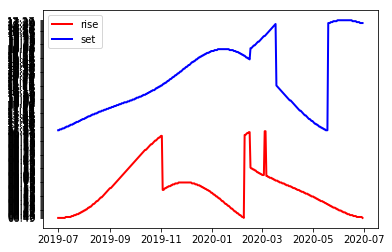

In [12]:
import matplotlib.pyplot as plt
plt.plot( 'date', 'sunrise', data=df, marker='', color='red', linewidth=2, label="rise")
plt.plot( 'date', 'sunset', data=df, marker='', color='blue', linewidth=2, label="set")
plt.legend()

In [0]:
df[30:90]